# __Extracted Tweets Data Analyis__

In [1]:
import matplotlib.pyplot as plt
import os, json, datetime
import seaborn as sns
import pandas as pd
from modules import utils
from modules import preprocessing as pp

ModuleNotFoundError: No module named 'unidecode'

In [2]:
DATA_PATH = 'data/tweets/'

week_list = utils.load_week_list(DATA_PATH)
print('Amount of extracted weeks: ', len(week_list))

Amount of extracted weeks:  26


In [3]:
print(week_list)

['week_01', 'week_02', 'week_03', 'week_04', 'week_05', 'week_06', 'week_07', 'week_08', 'week_09', 'week_10', 'week_11', 'week_12', 'week_pr_01', 'week_pr_02', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_pr_03', 'week_18', 'week_19', 'week_20', 'week_21', 'week_pr_04', 'week_22']


In [4]:
days = []
tts_amount = {
    'week': {
        'query_ext': [],
        'hashtag_ext': []
    },
    'day': {
        'query_ext': [],
        'hashtag_ext': []
    }
}
frequent_top_10_hashtags = {
    'query_ext': [],
    'hashtag_ext': []
}

for week in week_list:
    for file in os.listdir(DATA_PATH+week):
        if file.endswith('.json'):
            with open(f'{DATA_PATH+week}/{file}', encoding='utf-8') as week_info:
                data = json.load(week_info)
                tts_amount['week']['query_ext'].append(data['tweets_amount']['query_ext'])
                tts_amount['week']['hashtag_ext'].append(data['tweets_amount']['hashtag_ext'])
                for hashtag in data['top_10_hashtags']['query_ext']:
                    frequent_top_10_hashtags['query_ext'].append(hashtag)
                for hashtag in data['top_10_hashtags']['hashtag_ext']:
                    frequent_top_10_hashtags['hashtag_ext'].append(hashtag)
                for day in data['days_info']:
                    days.append(f'{week}_{day}')
                    tts_amount['day']['query_ext'].append(data['days_info'][day]['tweets_amount']['query_ext'])
                    tts_amount['day']['hashtag_ext'].append(data['days_info'][day]['tweets_amount']['hashtag_ext'])

## __Quantitative Analysis__

### __Tweets Amount__

In [5]:
weekly_tts_amount = pd.DataFrame(tts_amount['week'])
weekly_tts_amount['week'] = week_list

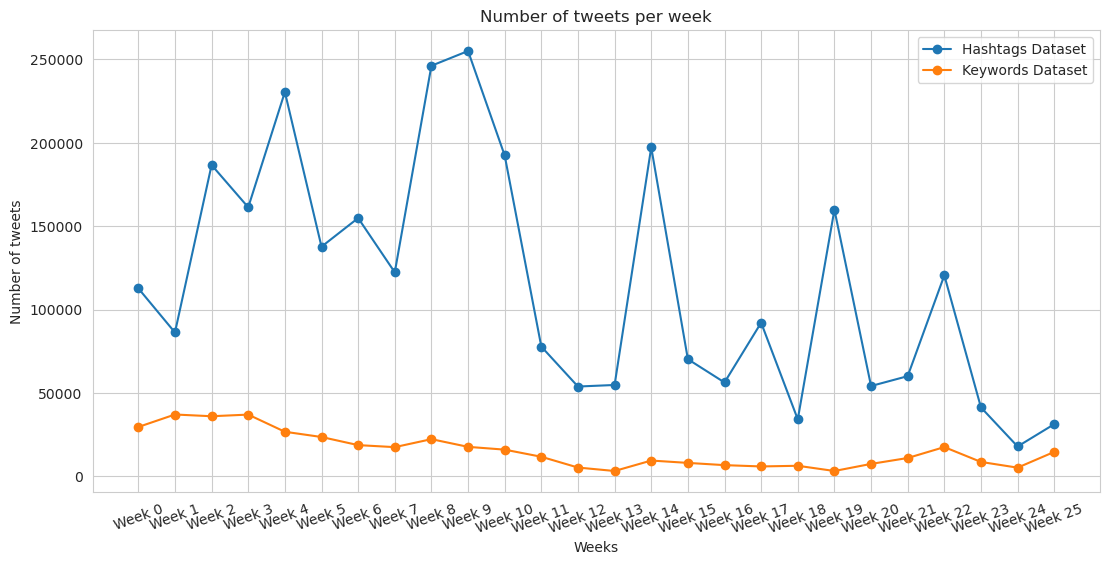

In [6]:
x_label = [f'Week {x}' for x in range(0,26)]
query_ext = weekly_tts_amount['query_ext']
hashtag_ext = weekly_tts_amount['hashtag_ext']

plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
plt.title('Number of tweets per week')
plt.xlabel('Weeks')
plt.ylabel('Number of tweets')
plt.plot(x_label, hashtag_ext, marker='o', label='Hashtags Dataset')
plt.plot(x_label, query_ext, marker='o', label='Keywords Dataset')
plt.legend()
plt.xticks(rotation=20)
plt.savefig('tweets_amount_per_week.png', dpi=300)
plt.show()
plt.close()

In [7]:
#plt.figure(figsize=(14,6))
#sns.set_style("whitegrid")
#ax = sns.lineplot(x='week', y='value', hue='dataset', data=pd.melt(weekly_tts_amount, ['week']).rename(columns={'variable':'dataset'}))
#ax.set(xlabel='week number', ylabel='amount of tweets')
#plt.title('Tweets amount per week')
#plt.xticks(rotation=20)
#plt.show()

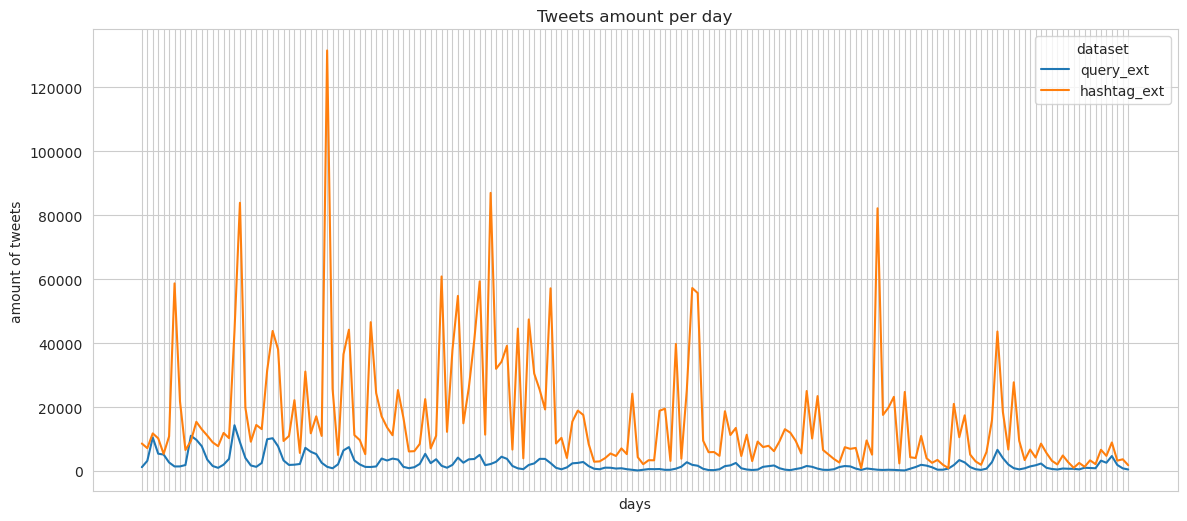

In [8]:
daily_tts_amount = pd.DataFrame(tts_amount['day'])
daily_tts_amount['day'] = days

plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.lineplot(x='day', y='value', hue='dataset', data=pd.melt(daily_tts_amount, ['day']).rename(columns={'variable':'dataset'}))
ax.set(xlabel='days', ylabel='amount of tweets')
plt.title('Tweets amount per day')
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.show()

In [9]:
print(f'''
Total number of weeks: {len(week_list)}

Total number of tweets:
- Query dataset: {sum(tts_amount['week']['query_ext'])}
- Hashtag dataset: {sum(tts_amount['week']['hashtag_ext'])}

Weeks with the highest amount of tweets:
- Query dataset: 
{weekly_tts_amount.sort_values(by='query_ext', ascending=False)[:5][['week','query_ext']].values.tolist()}
- Hashtag dataset: 
{weekly_tts_amount.sort_values(by='hashtag_ext', ascending=False)[:5][['week','hashtag_ext']].values.tolist()}

Days with the highest amount of tweets:
- Query dataset:
{daily_tts_amount.sort_values(by='query_ext', ascending=False)[:5][['day', 'query_ext']].values.tolist()}
- Hashtag dataset:
{daily_tts_amount.sort_values(by='hashtag_ext', ascending=False)[:5][['day', 'hashtag_ext']].values.tolist()}
''')


Total number of weeks: 26

Total number of tweets:
- Query dataset: 407291
- Hashtag dataset: 3007717

Weeks with the highest amount of tweets:
- Query dataset: 
[['week_02', 37097], ['week_04', 37037], ['week_03', 36058], ['week_01', 29618], ['week_05', 26749]]
- Hashtag dataset: 
[['week_10', 255016], ['week_09', 246175], ['week_05', 230436], ['week_13', 197249], ['week_11', 192390]]

Days with the highest amount of tweets:
- Query dataset:
[['week_03_day_4', 14333], ['week_02_day_3', 11035], ['week_01_day_3', 10495], ['week_04_day_4', 10262], ['week_04_day_3', 9957]]
- Hashtag dataset:
[['week_05_day_7', 131549], ['week_10_day_2', 87000], ['week_03_day_5', 83904], ['week_pr_03_day_3', 82177], ['week_08_day_7', 60863]]



### __User Amount__

In [10]:
file_lists = {}
user_count = {
    'query_ext': [],
    'hashtag_ext': []
}

users_query = []
users_hashtags = []

for week in week_list:
    query_users = []
    hashtag_users = []
    file_lists[week] = {
        'query_ext': [],
        'hashtag_ext': []
    }
    for file in os.listdir(DATA_PATH+week):
        if file.endswith('query_ext.parquet'):
            file_lists[week]['query_ext'].append(file)
        if file.endswith('hashtags_ext.parquet'):
            file_lists[week]['hashtag_ext'].append(file)
    file_lists[week]['query_ext'].sort()
    file_lists[week]['hashtag_ext'].sort()

#    for file in file_lists[week]['query_ext']:
#        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
#        for user in df['user']:
#            query_users.append(eval(user)['username'])
#            if eval(user)['username'] not in users_query:
#                users_query.append(eval(user)['username'])
#    user_count['query_ext'].append(len(set(query_users)))
#    for file in file_lists[week]['hashtag_ext']:
#        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
#        for user in df['user']:
#            hashtag_users.append(eval(user)['username'])
#            if eval(user)['username'] not in users_hashtags:
#                users_hashtags.append(eval(user)['username'])
#    user_count['hashtag_ext'].append(len(set(hashtag_users)))

In [11]:
user_count_df = pd.DataFrame(user_count)
user_count_df['week'] = week_list

#plt.figure(figsize=(14,6))
#sns.set_style("whitegrid")
#ax = sns.lineplot(x='week', y='value', hue='dataset', data=pd.melt(user_count_df, ['week']).rename(columns={'variable':'dataset'}))
#ax.set(xlabel='week number', ylabel='amount of users')
#plt.title('Users amount per week')
#plt.xticks(rotation=15)
#plt.show()

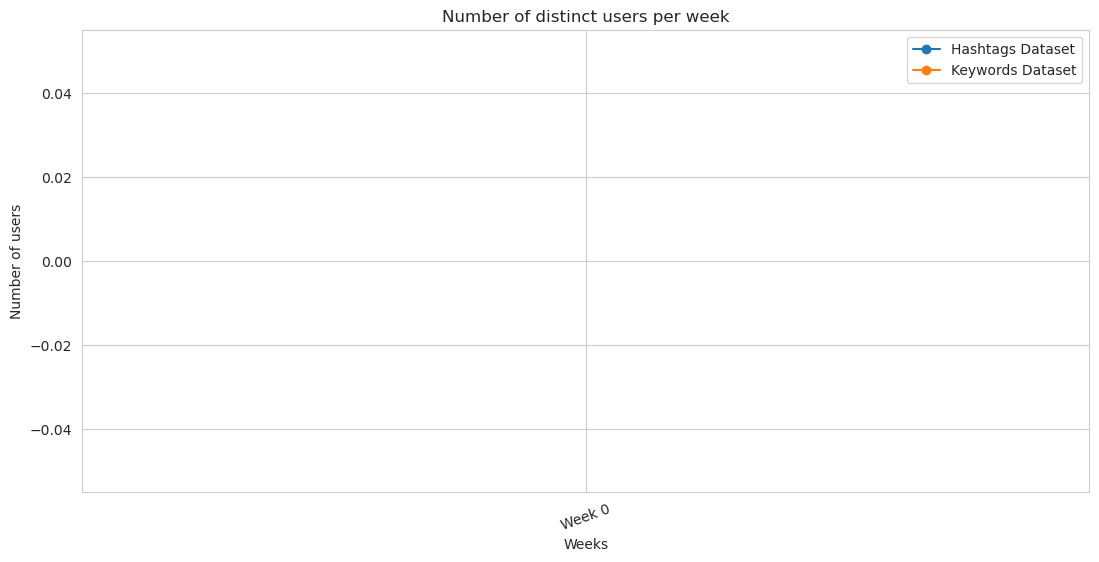

In [12]:
plt.figure(figsize=(13,6))
sns.set_style('whitegrid')
plt.title('Number of distinct users per week')
plt.xlabel('Weeks')
plt.ylabel('Number of users')
plt.plot(x_label, user_count_df['hashtag_ext'], marker='o', label='Hashtags Dataset')
plt.plot(x_label, user_count_df['query_ext'], marker='o', label='Keywords Dataset')
plt.legend()
plt.xticks(rotation=20)
plt.savefig('users_amount_per_week.png', dpi=300)
plt.show()
plt.close()

In [13]:
len(set(users_hashtags))

0

In [14]:
len(set(users_query))

0

## __Qualitative Analysis__

### __Hashtag Analysis__

#### Most frequent hashtags in the Top 10

In [15]:
pd.Series(frequent_top_10_hashtags['query_ext']).value_counts()[:10]

#forabolsonaro            22
#cpidapandemia            20
#cpi                      19
#cpidacovid               18
#forabolsonarogenocida    16
#pandemia                 15
#cpidocirco               14
#brasil                   12
#covid                    12
#covid19                  10
dtype: int64

In [16]:
pd.Series(frequent_top_10_hashtags['hashtag_ext']).value_counts()[:10]

#forabolsonaro            7
#bolsonaro2022            5
#fakenews                 5
#cpidapandemia            5
#cpidacovid19             5
#vacinassalvamvidas       4
#impeachmentja            4
#vacina                   4
#forabol卐onarogenocida    4
#coronavac                3
dtype: int64

#### Most frequent hashtags throughout the period

In [17]:
hashtags = {
    'query_ext': [],
    'hashtag_ext': []
}

for week in week_list:
    for file in file_lists[week]['query_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for hashtag_list in df['hashtags']:
            hashtag_list = eval(hashtag_list)
            if hashtag_list:
                for hashtag in hashtag_list:
                    hashtags['query_ext'].append(hashtag.lower())
    for file in file_lists[week]['hashtag_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for hashtag_list in df['hashtags']:
            hashtag_list = eval(hashtag_list)
            if hashtag_list:
                for hashtag in hashtag_list:
                    hashtags['hashtag_ext'].append(hashtag.lower())

In [18]:
pd.Series(hashtags['query_ext']).value_counts()[:10]

cpidacovid        10235
cpidapandemia      4285
cpi                3078
forabolsonaro      2149
cpidocirco         1550
globonews          1441
covid              1179
pandemia           1145
cpidogenocidio     1086
covid19            1068
dtype: int64

In [19]:
pd.Series(hashtags['hashtag_ext']).value_counts()[:10]

cpidacovid               606651
forabolsonaro            594875
forabolsonarogenocida    150344
cpidapandemia            142701
renanvagabundo           115794
cpidocirco               111482
renansabiadetudo          88848
29mforabolsonaro          79660
euautorizopresidente      79111
bolsonarogenocida         57089
dtype: int64

### __Topic Analysis__

In [20]:
import re, string
import nltk

In [21]:
docs = {
    'query_ext': [],
    'hashtag_ext': []
}

for week in week_list:
    for file in file_lists[week]['query_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for tweet in df['content']:
            docs['query_ext'].append(tweet)
    for file in file_lists[week]['hashtag_ext']:
        df = pd.read_parquet(f'{DATA_PATH+week}/{file}')
        for tweet in df['content']:
            docs['hashtag_ext'].append(tweet)
   
# removing duplicated tweets
for key in docs:
    tweets_series = pd.Series(docs[key])
    tweets_series.drop_duplicates(inplace=True)
    docs[key] = tweets_series.tolist()

#### Preprocessing Pipeline

In [22]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words.extend(['pra', 'tá', 'sobre', 'ser', 'vai', 'ouve', 'diz', 'dia', 'bom', 'hoje', 'tudo', 'lepera',
                   'via', 'vamos', 'bora', 'agora', 'desse', 'aqui', 'faz', 'ainda', 'tão', 'cada', 'bbb'])

def remove_emoji(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    return emoji_pattern.sub(r'', tweet)

def remove_link(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'bit.ly/\S+', '', tweet)
    tweet = tweet.strip('[link]')
    tweet = re.sub(r'pic.twitter\S+', '', tweet)
    return tweet

def remove_users(tweet):
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    return tweet

def remove_hashtags(tweet):
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
    return tweet

def remove_av(tweet):
    tweet = re.sub(r'VIDEO:', '', tweet)
    tweet = re.sub(r'AUDIO:', '', tweet)
    return tweet

def tweet_preproc(tweet):
    '''
    Remove: @mentions, #hashtags, URL
    links, punctuation and emojis,
    and multiple white spaces
    '''
    tweet = remove_emoji(tweet)
    tweet = remove_link(tweet)
    tweet = remove_users(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = re.sub(r'\d', '', tweet)
    tweet = tweet.lower()
    tweet = [word for word in tweet.split() if len(word)>2 and word not in stop_words]

    return tweet


In [23]:
for key in docs:
    doc = []
    for tweet in docs[key]:
        doc.append(tweet_preproc(tweet))
    docs[key] = doc

In [24]:
 print(f'''
Amount of tweets
- Query dataset: {len(docs['query_ext'])}
- Hashtag dataset: {len(docs['hashtag_ext'])}
''')


Amount of tweets
- Query dataset: 404559
- Hashtag dataset: 2965552



In [41]:
docs['query_ext'][0]

['cpi',
 'covid',
 'rir',
 'jovem',
 'bando',
 'corrupto',
 'fazer',
 'alguma',
 'coisa',
 'além',
 'proselitismo',
 'político',
 'estude',
 'definição',
 'genocídio',
 'pare',
 'passar',
 'vergonha',
 'cairão',
 'lado',
 'mil',
 'direita',
 'serás',
 'atingindo']

In [42]:
docs['hashtag_ext'][0]

['fique', 'certo', 'extrema', 'esquerda', 'contra']

#### __LDA Topic Modeling__

In [12]:
import gensim
from gensim import corpora as corpora
import pyLDAvis.gensim_models
import pyLDAvis
import pickle

__QUERY DATASET__

In [28]:
# create dictionary
id2word = corpora.Dictionary(docs['query_ext'])

# create corpus
texts = docs['query_ext']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)]


In [29]:
from pprint import pprint

# number of topics
num_topics = 10

# build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.088*"cpi" + 0.059*"covid" + 0.028*"pandemia" + 0.018*"luciano" + '
  '0.017*"hang" + 0.015*"bolsonaro" + 0.011*"presidente" + 0.010*"aziz" + '
  '0.009*"omar" + 0.008*"brasil"'),
 (1,
  '0.073*"cpi" + 0.052*"covid" + 0.022*"renan" + 0.019*"relatório" + '
  '0.019*"bolsonaro" + 0.016*"pandemia" + 0.015*"calheiros" + 0.012*"final" + '
  '0.008*"presidente" + 0.008*"contra"'),
 (2,
  '0.085*"cpi" + 0.064*"covid" + 0.023*"pandemia" + 0.010*"bolsonaro" + '
  '0.009*"saúde" + 0.009*"depoimento" + 0.008*"governo" + 0.008*"relatório" + '
  '0.008*"comissão" + 0.008*"nesta"'),
 (3,
  '0.066*"cpi" + 0.043*"covid" + 0.026*"pandemia" + 0.018*"governadores" + '
  '0.015*"prevent" + 0.012*"senior" + 0.011*"tratamento" + 0.011*"federal" + '
  '0.011*"dinheiro" + 0.009*"governo"'),
 (4,
  '0.082*"cpi" + 0.071*"covid" + 0.014*"senador" + 0.011*"marcos" + '
  '0.009*"rogério" + 0.009*"pandemia" + 0.009*"depoimento" + 0.008*"contra" + '
  '0.008*"pazuello" + 0.007*"bolsonaro"'),
 (5,
  '0.074*"

In [1]:
#pyLDAvis.enable_notebook()
#lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
#pyLDAvis.display(lda_display)

In [31]:
del id2word, texts, corpus

__HASHTAGS DATASET__

In [13]:
# create dictionary
id2word = corpora.Dictionary(docs['hashtag_ext'])

# create corpus
texts = docs['hashtag_ext']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [14]:
from pprint import pprint

# number of topics
num_topics = 10

# build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

doc_lda = lda_model[corpus]

[(0,
  '0.044*"luciano" + 0.041*"rede" + 0.037*"outforabolsonaro" + 0.036*"núcleo" '
  '+ 0.031*"bolsonaro" + 0.015*"tácaroculpadobolsonaro" + 0.013*"voto" + '
  '0.012*"contra" + 0.009*"hang" + 0.008*"pec"'),
 (1,
  '0.022*"verdade" + 0.015*"havan" + 0.012*"certeza" + 0.011*"cadeia" + '
  '0.010*"acabou" + 0.010*"véio" + 0.008*"bolsonaro" + 0.008*"claro" + '
  '0.008*"cima" + 0.007*"ter"'),
 (2,
  '0.030*"cpi" + 0.019*"senador" + 0.015*"marcos" + 0.014*"rogério" + '
  '0.012*"senadores" + 0.009*"quer" + 0.009*"dinheiro" + 0.008*"heinze" + '
  '0.008*"circo" + 0.008*"stf"'),
 (3,
  '0.021*"covid" + 0.013*"vacina" + 0.013*"mil" + 0.011*"governo" + '
  '0.010*"pessoas" + 0.010*"pandemia" + 0.009*"saúde" + 0.009*"milhões" + '
  '0.009*"brasil" + 0.008*"depoimento"'),
 (4,
  '0.023*"renan" + 0.020*"bem" + 0.018*"omar" + 0.016*"bolsonaro" + '
  '0.012*"aziz" + 0.010*"boa" + 0.010*"cpi" + 0.008*"senador" + '
  '0.008*"calheiros" + 0.008*"randolfe"'),
 (5,
  '0.029*"presidente" + 0.023*"bolso

In [2]:
#pyLDAvis.enable_notebook()
#lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
#pyLDAvis.display(lda_display)

In [16]:
del id2word, texts, corpus

#### Train STTM Model

In [27]:
from gsdmm import MovieGroupProcess # loading gsdmm model

 __QUERY DATASET__

In [28]:
vocab = set(x for doc in docs['query_ext'] for x in doc)
n_terms = len(vocab)

print(f'''
QUERY DATASET
Vocabulary size: {n_terms}
Number of documents: {len(docs['query_ext'])}
''')


QUERY DATASET
Vocabulary size: 130791
Number of documents: 404559



In [30]:
mgp = MovieGroupProcess(K=12, alpha=0.10, beta=0.10, n_iters=30)

y = mgp.fit(docs['query_ext'], n_terms)

In stage 0: transferred 355142 clusters with 12 clusters populated
In stage 1: transferred 266320 clusters with 12 clusters populated
In stage 2: transferred 168373 clusters with 12 clusters populated
In stage 3: transferred 121646 clusters with 12 clusters populated
In stage 4: transferred 100178 clusters with 12 clusters populated
In stage 5: transferred 88643 clusters with 12 clusters populated
In stage 6: transferred 82443 clusters with 12 clusters populated
In stage 7: transferred 78875 clusters with 12 clusters populated
In stage 8: transferred 75977 clusters with 12 clusters populated
In stage 9: transferred 74698 clusters with 12 clusters populated
In stage 10: transferred 74070 clusters with 12 clusters populated
In stage 11: transferred 73062 clusters with 12 clusters populated
In stage 12: transferred 71775 clusters with 12 clusters populated
In stage 13: transferred 70835 clusters with 12 clusters populated
In stage 14: transferred 69817 clusters with 12 clusters populated


In [31]:
import numpy as np

doc_count = np.array(mgp.cluster_doc_count)

In [32]:
print('Number of documents per topic: ', doc_count)

Number of documents per topic:  [28204 44622 24521 35759 24424 36211 47168 68611  3042 37655 20880 33462]


In [33]:
top_index = doc_count.argsort()[-12:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [ 7  6  1  9  5  3 11  0  2  4 10  8]


In [34]:
# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(mgp.cluster_word_distribution, top_index, 15)


Cluster 7 : [('cpi', 70540), ('covid', 60421), ('pandemia', 9105), ('ver', 4151), ('gente', 3916), ('assistir', 3589), ('melhor', 2878), ('cara', 2859), ('assistindo', 2648), ('nada', 2588), ('brasil', 2499), ('pazuello', 2239), ('vendo', 2208), ('entretenimento', 2136), ('ter', 2132)]

Cluster 6 : [('cpi', 49410), ('covid', 32718), ('pandemia', 19006), ('governo', 8671), ('bolsonaro', 8305), ('brasil', 6406), ('mortes', 4879), ('mil', 4751), ('presidente', 4409), ('vacina', 3854), ('vacinas', 3670), ('ter', 3472), ('contra', 3313), ('pessoas', 3227), ('país', 3193)]

Cluster 1 : [('cpi', 48772), ('covid', 34148), ('pandemia', 11295), ('bolsonaro', 9353), ('presidente', 4729), ('governo', 4361), ('stf', 3541), ('contra', 3203), ('brasil', 3136), ('nada', 3001), ('foco', 2469), ('povo', 2339), ('pode', 2237), ('senado', 2215), ('quer', 2006)]

Cluster 9 : [('cpi', 42239), ('covid', 21153), ('pandemia', 18192), ('governadores', 8422), ('dinheiro', 7734), ('presidente', 5883), ('investig

### __HASHTAG DATASET__

In [35]:
vocab = set(x for doc in docs['hashtag_ext'] for x in doc)
n_terms = len(vocab)

print(f'''
HASHTAG DATASET
Vocabulary size: {n_terms}
Number of documents: {len(docs['hashtag_ext'])}
''')


HASHTAG DATASET
Vocabulary size: 393910
Number of documents: 2965552



In [36]:
mgp = MovieGroupProcess(K=12, alpha=0.10, beta=0.10, n_iters=30)

y = mgp.fit(docs['hashtag_ext'], n_terms)

In stage 0: transferred 2668071 clusters with 12 clusters populated
In stage 1: transferred 2414620 clusters with 12 clusters populated
In stage 2: transferred 1835340 clusters with 12 clusters populated
In stage 3: transferred 1362721 clusters with 12 clusters populated
In stage 4: transferred 1184784 clusters with 12 clusters populated
In stage 5: transferred 1115523 clusters with 12 clusters populated
In stage 6: transferred 1080531 clusters with 12 clusters populated
In stage 7: transferred 1055192 clusters with 12 clusters populated
In stage 8: transferred 1038632 clusters with 12 clusters populated
In stage 9: transferred 1024426 clusters with 12 clusters populated
In stage 10: transferred 1013343 clusters with 12 clusters populated
In stage 11: transferred 1003959 clusters with 12 clusters populated
In stage 12: transferred 995601 clusters with 12 clusters populated
In stage 13: transferred 987271 clusters with 12 clusters populated
In stage 14: transferred 980134 clusters with 

In [37]:
import numpy as np

doc_count = np.array(mgp.cluster_doc_count)

In [38]:
print('Number of documents per topic: ', doc_count)

Number of documents per topic:  [149647 206512 442443  70903 208246  98537  79456 362949 233449 480421
 371963 261026]


In [39]:
top_index = doc_count.argsort()[-12:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

Most important clusters (by number of docs inside): [ 9  2 10  7 11  8  4  1  0  5  6  3]


In [40]:
# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(mgp.cluster_word_distribution, top_index, 15)


Cluster 9 : [('senador', 41970), ('cpi', 34921), ('cara', 28329), ('marcos', 27184), ('rogério', 25357), ('falar', 17285), ('gente', 17011), ('fala', 16064), ('omar', 15871), ('bolsonaro', 13175), ('heinze', 13137), ('falando', 13121), ('vergonha', 12718), ('renan', 12254), ('nada', 11260)]

Cluster 2 : [('gente', 20049), ('bolsonaro', 19944), ('vou', 15949), ('tag', 14475), ('brasil', 14193), ('ver', 13460), ('pode', 11807), ('mforabolsonaro', 11729), ('fazer', 9268), ('bem', 8890), ('ter', 8863), ('presidente', 8436), ('boa', 8143), ('nada', 8042), ('coisa', 8006)]

Cluster 10 : [('brasil', 33733), ('bolsonaro', 32029), ('povo', 29422), ('presidente', 22430), ('país', 21112), ('contra', 18047), ('governo', 17726), ('todos', 17396), ('bem', 12868), ('gente', 12039), ('sempre', 11221), ('esquerda', 11079), ('nada', 10610), ('pessoas', 10324), ('ter', 10084)]

Cluster 7 : [('bolsonaro', 56081), ('presidente', 33911), ('brasil', 32646), ('genocida', 21407), ('povo', 20591), ('ladrão', 1